# EDA(KEŞİFSEL VERİ ANALİZİ)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [41]:
dfcar=pd.read_csv('../carPrice.csv',index_col=0)
dfcar

symboling   carCompany fueltype aspiration doornumber      carbody  \
car_ID                                                                       
1               3  alfa-romero      gas        std        two  convertible   
2               3  alfa-romero      gas        std        two  convertible   
3               1  alfa-romero      gas        std        two    hatchback   
4               2         audi      gas        std       four        sedan   
5               2         audi      gas        std       four        sedan   
6               2         audi      gas        std        two        sedan   
7               1         audi      gas        std       four        sedan   
8               1         audi      gas        std       four        wagon   
9               1         audi      gas      turbo       four        sedan   
10              0         audi      gas      turbo        two    hatchback   
11              2          bmw      gas        std        two        sedan   
12              0          bmw      gas        std       four        sedan   
13              0          bmw      gas        std        two        sedan   
14              0          bmw      gas        std       four        sedan   
15              1          bmw      gas        std       four        sedan   
16              0          bmw      gas        std       four        sedan   
17              0          bmw      gas        std        two        sedan   
18              0          bmw      gas        std       four        sedan   
19              2    chevrolet      gas        std        two    hatchback   
20              1    chevrolet      gas        std        two    hatchback   
21              0    chevrolet      gas        std       four        sedan   
22              1        dodge      gas        std        two    hatchback   
23              1        dodge      gas        std        two    hatchback   
24              1        dodge      gas      turbo        two    hatchback   
25              1        dodge      gas        std       four    hatchback   
26              1        dodge      gas        std       four        sedan   
27              1        dodge      gas        std       four        sedan   
28              1        dodge      gas      turbo        two        sedan   
29             -1        dodge      gas        std       four        wagon   
30              3        dodge      gas      turbo        two    hatchback   
...           ...          ...      ...        ...        ...          ...   
176            -1       toyota      gas        std       four    hatchback   
177            -1       toyota      gas        std       four        sedan   
178            -1       toyota      gas        std       four    hatchback   
179             3       toyota      gas        std        two    hatchback   
180             3       toyota      gas        std        two    hatchback   
181            -1       toyota      gas        std       four        sedan   
182            -1       toyota      gas        std       four        wagon   
183             2   volkswagen   diesel        std        two        sedan   
184             2   volkswagen      gas        std        two        sedan   
185             2   volkswagen   diesel        std       four        sedan   
186             2   volkswagen      gas        std       four        sedan   
187             2   volkswagen      gas        std       four        sedan   
188             2   volkswagen   diesel      turbo       four        sedan   
189             2   volkswagen      gas        std       four        sedan   
190             3   volkswagen      gas        std        two  convertible   
191             3   volkswagen      gas        std        two    hatchback   
192             0   volkswagen      gas        std       four        sedan   
193             0   volkswagen   diesel      turbo       four        sedan   
194             0   volkswagen

In [3]:
dfcar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
symboling           205 non-null int64
carCompany          205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [4]:
kategorik=['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']

In [5]:
dfcar.nunique()

symboling             6
carCompany           22
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

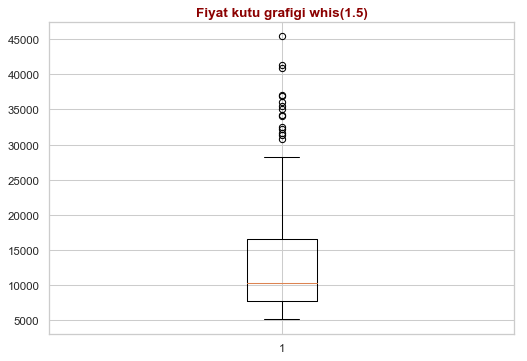

In [6]:
plt.rcParams['figure.dpi']=75
plt.rcParams['figure.figsize']=(8,5.5)
baslik_font={'family':'arial','color':'darkred','weight':'bold','size':13}
eksen_font={'family':'arial','color':'darkblue','weight':'bold','size':10}
plt.boxplot(dfcar.price,whis=1.5)
plt.title('Fiyat kutu grafigi whis(1.5)',fontdict=baslik_font)
plt.show()

In [7]:
from scipy.stats import zscore
esik_degerleri=pd.DataFrame(columns=['esik_degeri','aykiri_deger_sayisi','aykiri_deger_sayisi_log'])
z_scores=zscore((dfcar['price']))
log_z_scores=zscore((np.log(dfcar['price'])))
for threshold in range(1,5):
    esik_degerleri=esik_degerleri.append({'esik_degeri':threshold,
                                          'aykiri_deger_sayisi':len(z_scores[z_scores>threshold]),
                                          'aykiri_deger_sayisi_log':len(log_z_scores[log_z_scores>threshold])}, ignore_index=True)
display(esik_degerleri)

esik_degeri aykiri_deger_sayisi aykiri_deger_sayisi_log
0           1                  24                      27
1           2                  15                      13
2           3                   3                       0
3           4                   1                       0

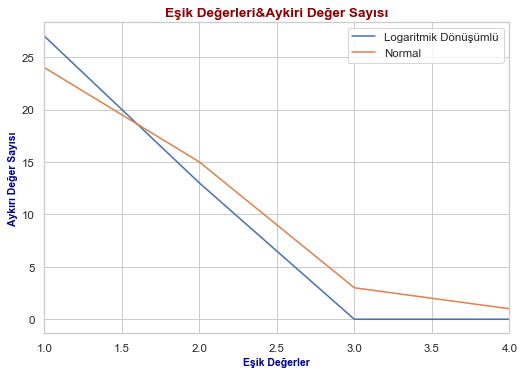

In [8]:
esik_degerleri.plot(x='esik_degeri',y=['aykiri_deger_sayisi_log','aykiri_deger_sayisi'])
plt.title('Eşik Değerleri&Aykiri Değer Sayısı',fontdict=baslik_font)
plt.xlabel('Eşik Değerler',fontdict=eksen_font)
plt.ylabel('Aykırı Değer Sayısı',fontdict=eksen_font)
plt.legend(('Logaritmik Dönüşümlü','Normal'))
plt.show()

In [10]:
pd.options.display.float_format = '{:.3f}'.format
dfcar.describe()

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
count    205.000    205.000    205.000   205.000    205.000     205.000   
mean       0.834     98.757    174.049    65.908     53.725    2555.566   
std        1.245      6.022     12.337     2.145      2.444     520.680   
min       -2.000     86.600    141.100    60.300     47.800    1488.000   
25%        0.000     94.500    166.300    64.100     52.000    2145.000   
50%        1.000     97.000    173.200    65.500     54.100    2414.000   
75%        2.000    102.400    183.100    66.900     55.500    2935.000   
max        3.000    120.900    208.100    72.300     59.800    4066.000   

       enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
count     205.000    205.000 205.000           205.000     205.000  205.000   
mean      126.907      3.330   3.255            10.143     104.117 5125.122   
std        41.643      0.271   0.314             3.972      39.544  476.986   
min        61.000      2.540   2.070             7.000      48.000 4150.000   
25%        97.000      3.150   3.110             8.600      70.000 4800.000   
50%       120.000      3.310   3.290             9.000      95.000 5200.000   
75%       141.000      3.580   3.410             9.400     116.000 5500.000   
max       326.000      3.940   4.170            23.000     288.000 6600.000   

       citympg  highwaympg     price  
count  205.000     205.000   205.000  
mean    25.220      30.751 13276.711  
std      6.542       6.886  7988.852  
min     13.000      16.000  5118.000  
25%     19.000      25.000  7788.000  
50%     24.000      30.000 10295.000  
75%     30.000      34.000 16503.000  
max     49.000      54.000 45400.000

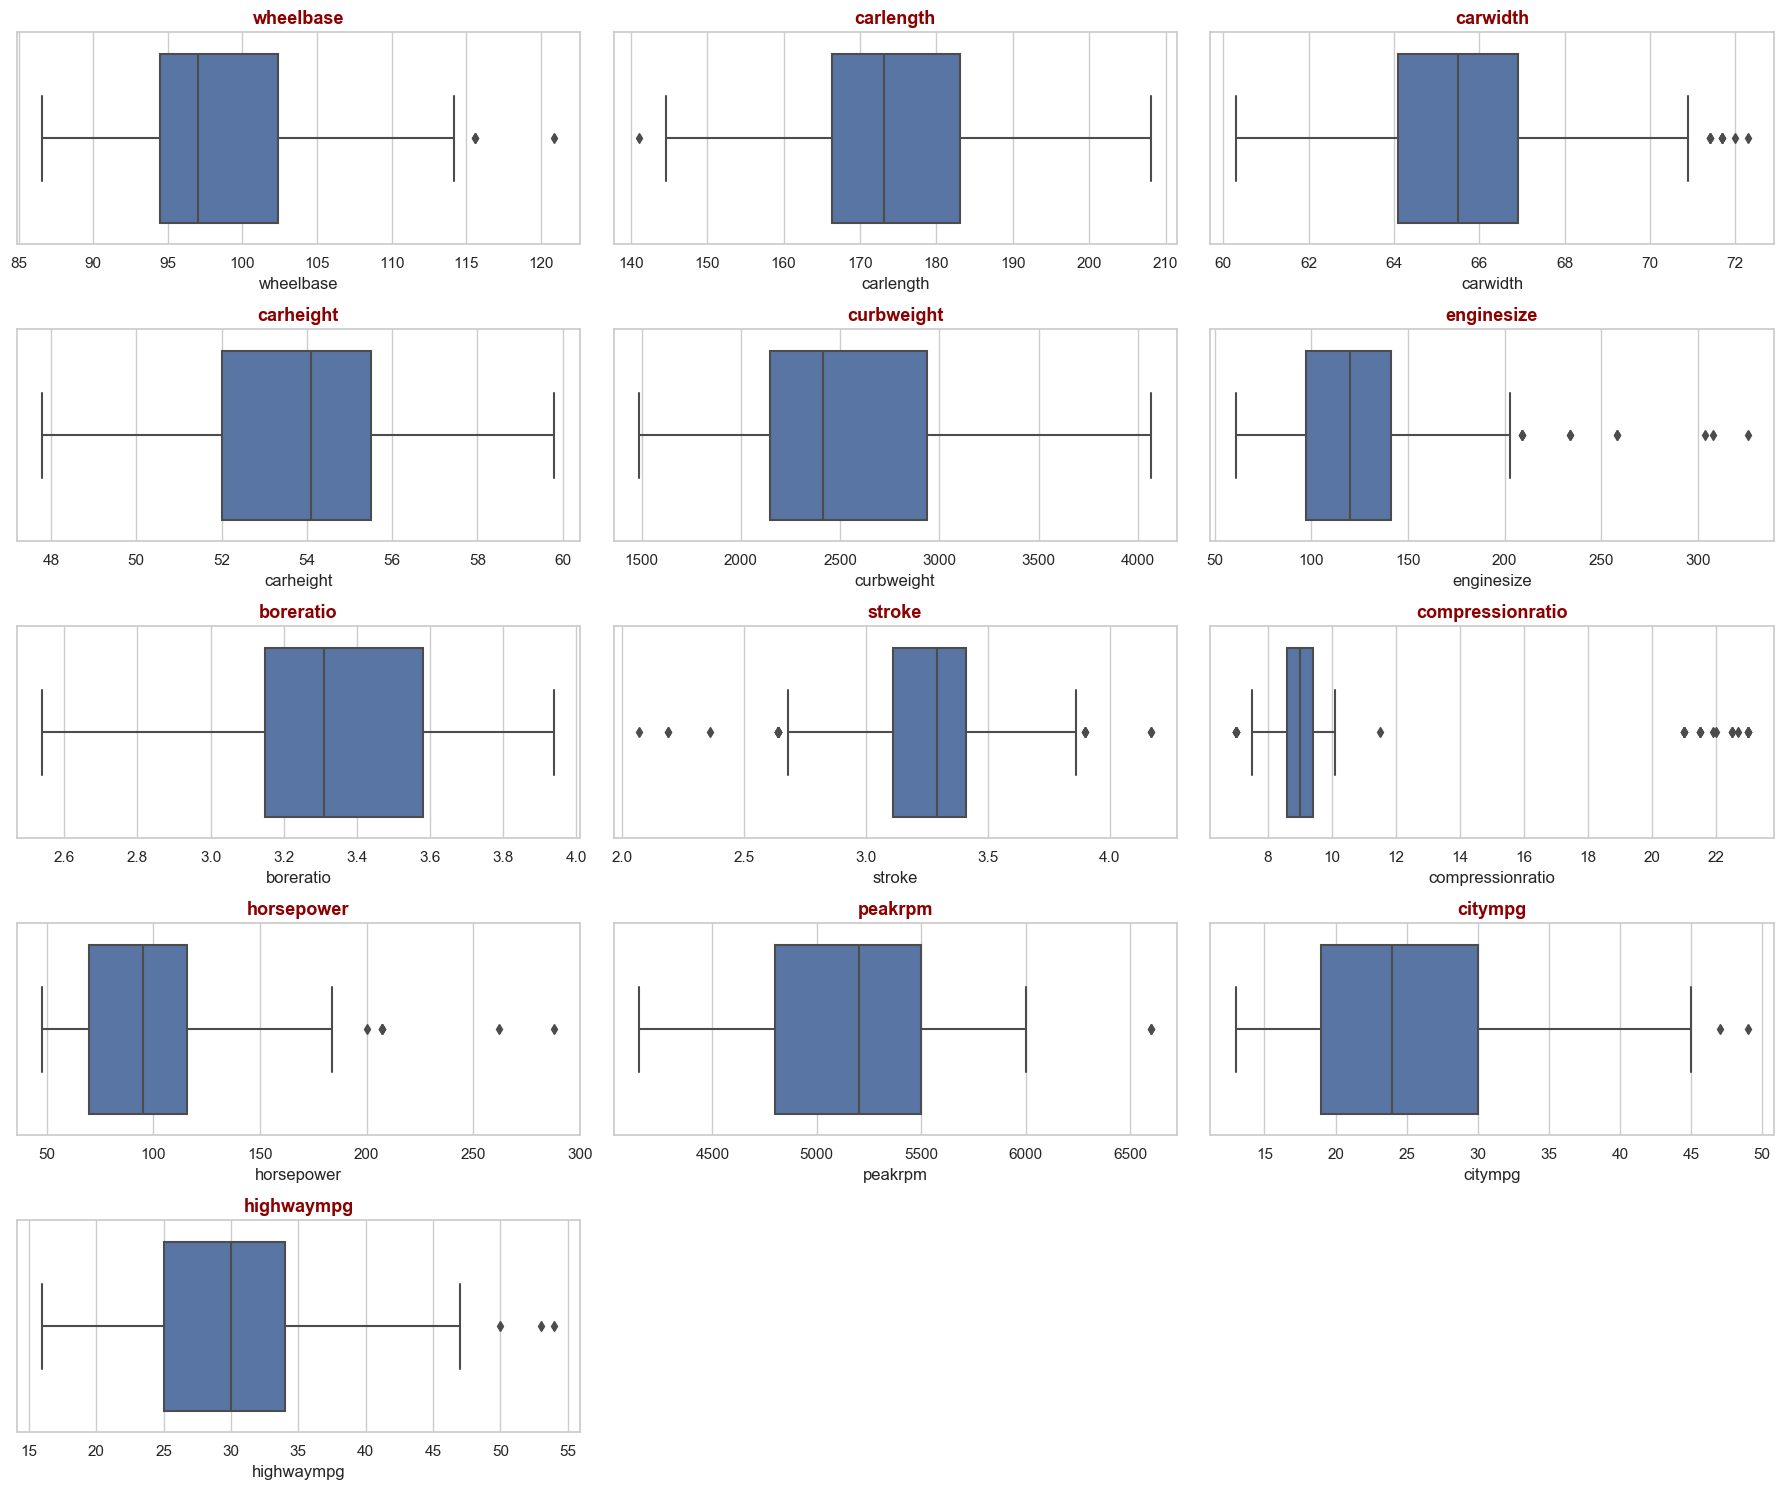

In [11]:
plt.figure(figsize=(18,15),dpi=100)
fill_list=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio',
           'horsepower','peakrpm','citympg','highwaympg']
for i,col in enumerate(fill_list):
    plt.subplot(5,3,i+1)
    sns.boxplot(col, data=dfcar)
    plt.title(col,fontdict=baslik_font)
plt.tight_layout()
plt.show()

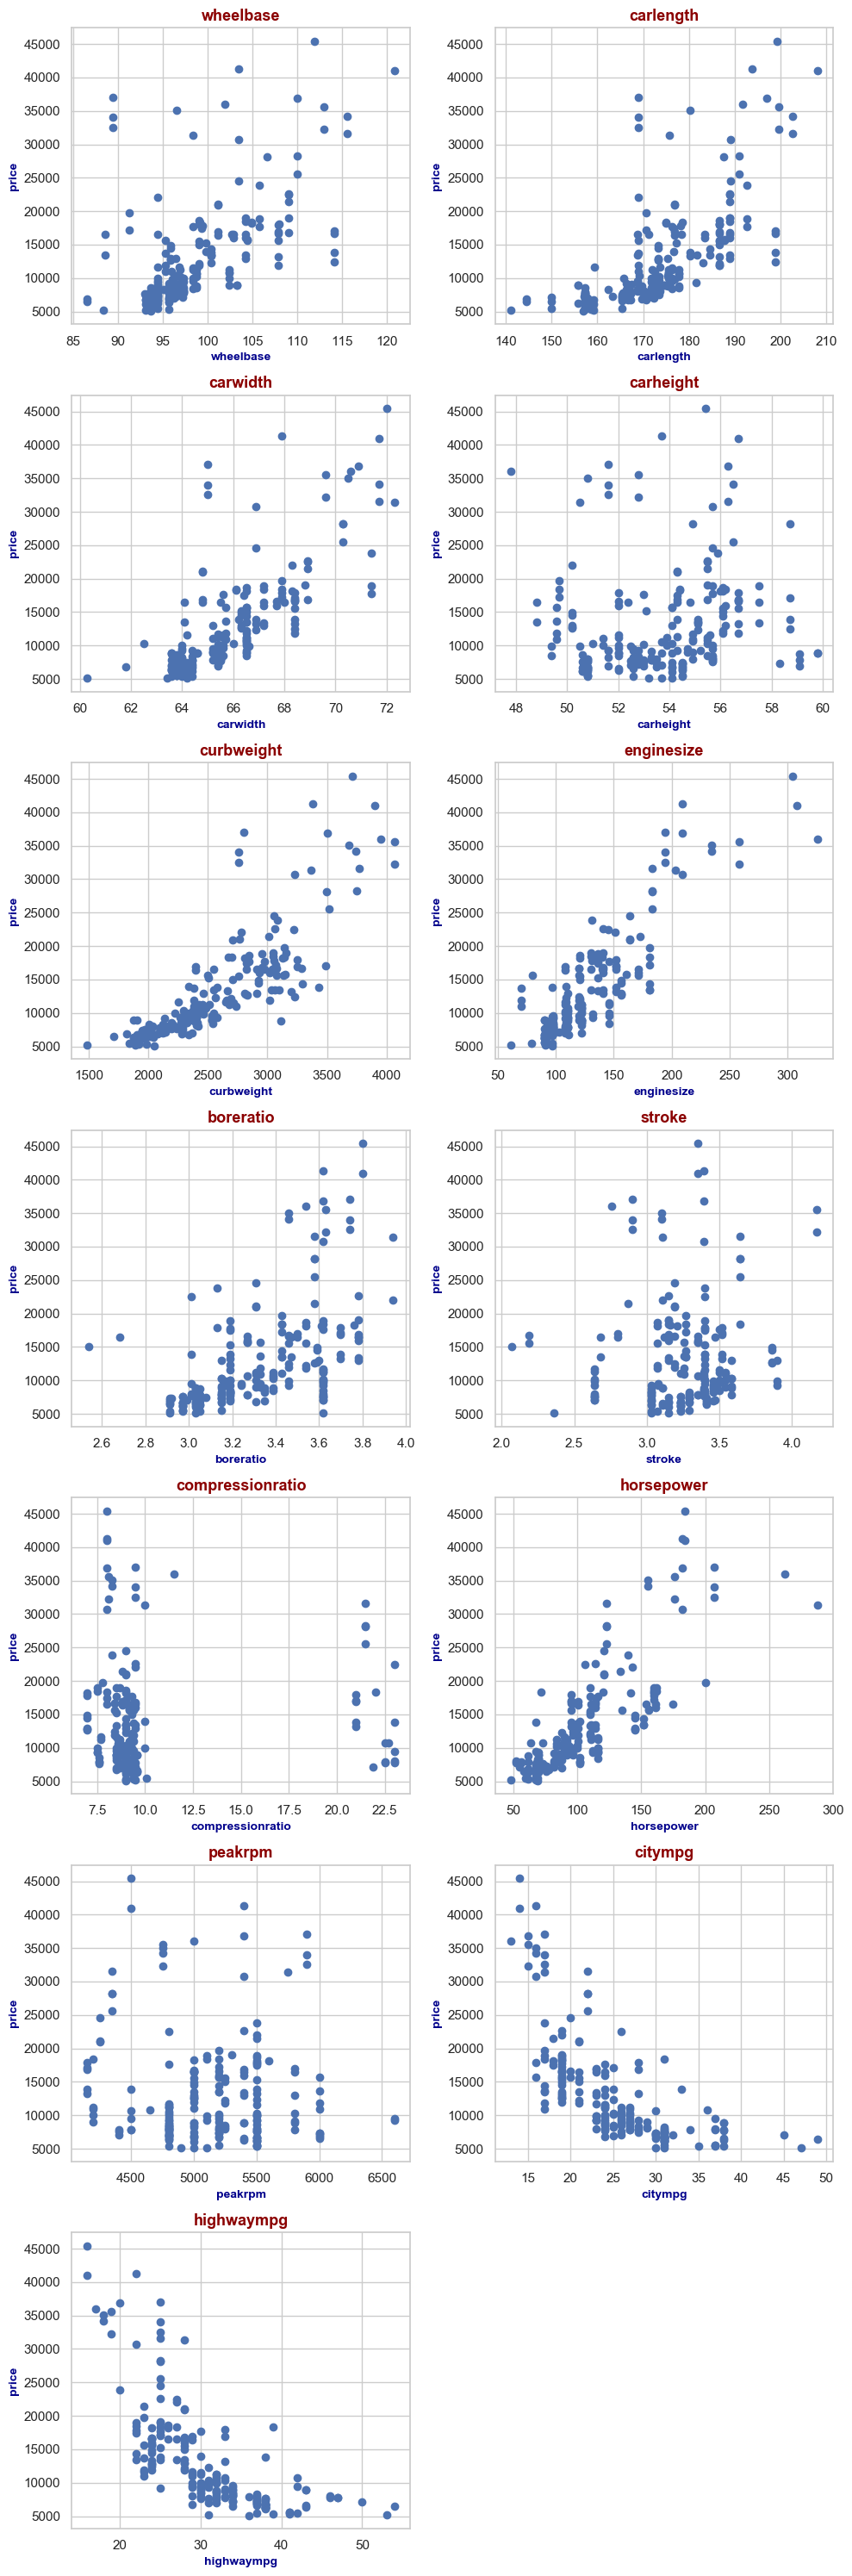

In [12]:
plt.figure(figsize=(10,30),dpi=100)
for i,col in enumerate(fill_list):
    plt.subplot(7,2,i+1)
    plt.scatter(col,'price', data=dfcar)
    plt.title(col,fontdict=baslik_font)
    plt.xlabel(col,fontdict=eksen_font)
    plt.ylabel('price',fontdict=eksen_font)
plt.tight_layout()
plt.show()

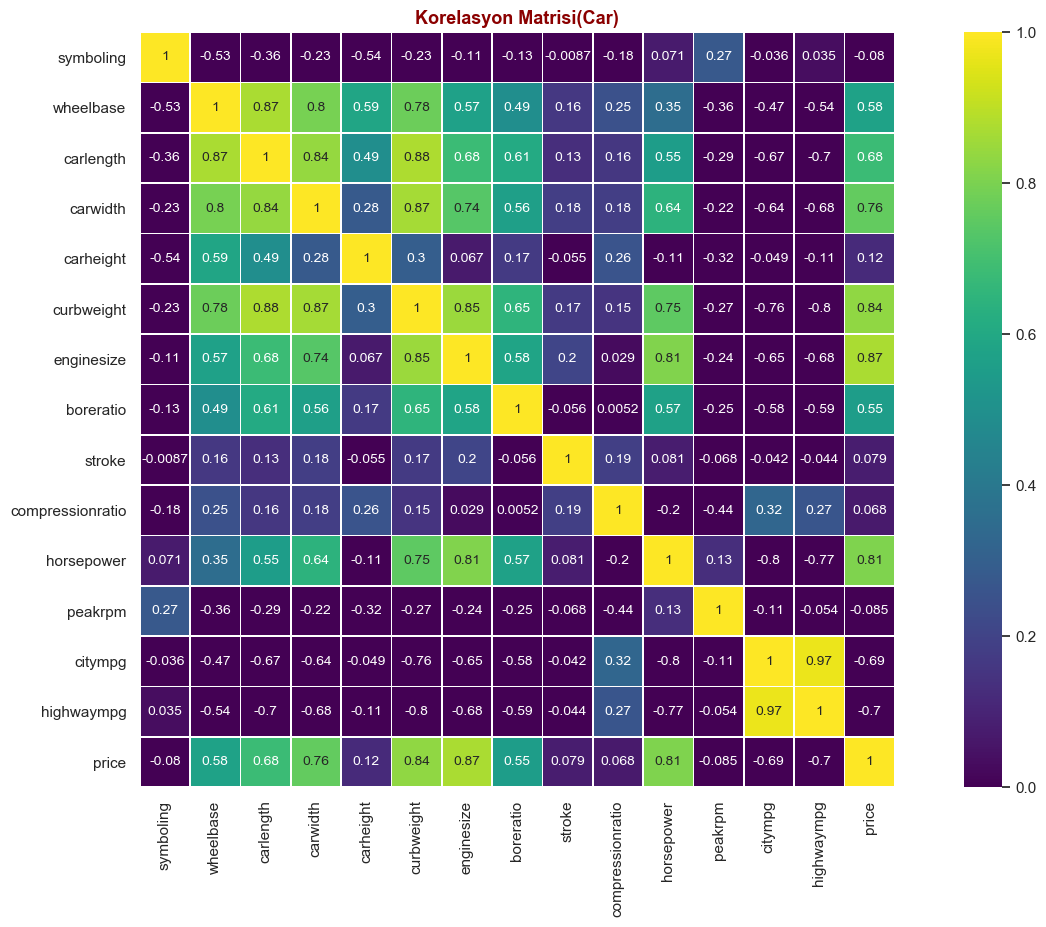

In [13]:
plt.figure(figsize=(18,10),dpi=100)
sns.heatmap(dfcar.corr(),square=True,annot=True,linewidths=.5,vmin=0,vmax=1,cmap='viridis')
plt.title('Korelasyon Matrisi(Car)',fontdict=baslik_font)
display()

In [14]:
yuksek_korr=dfcar.corr().price.abs().sort_values(ascending=False).index[0:8]

In [15]:
yuksek_korr

Index(['price', 'enginesize', 'curbweight', 'horsepower', 'carwidth',
       'highwaympg', 'citympg', 'carlength'],
      dtype='object')

In [16]:
dfcar[yuksek_korr].corr().price

price         1.000
enginesize    0.874
curbweight    0.835
horsepower    0.808
carwidth      0.759
highwaympg   -0.698
citympg      -0.686
carlength     0.683
Name: price, dtype: float64

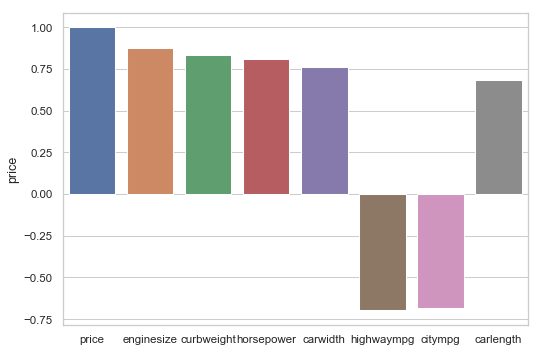

In [17]:
sns.barplot(x=yuksek_korr,y=dfcar[yuksek_korr].corr().price)
plt.show()

In [18]:
carCompany_count=dfcar['carCompany'].value_counts()

In [19]:
carCompany_count

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
chevrolet         3
jaguar            3
alfa-romero       3
renault           2
mercury           1
Name: carCompany, dtype: int64

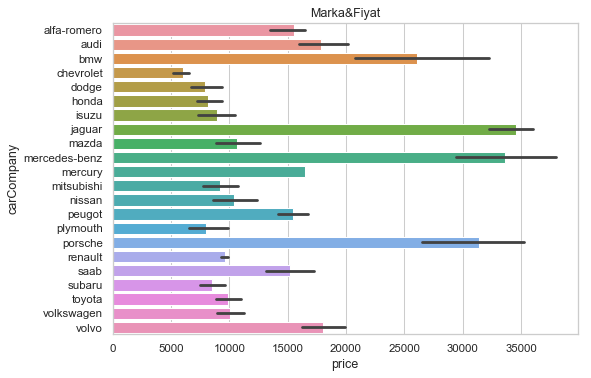

In [20]:
sns.barplot(dfcar.price,dfcar.carCompany)
plt.title('Marka&Fiyat')
plt.show()

Markaları fiyat aralıklarına göre gruplayalım ve bu sayede analizimizi daha anlaşılır hale getirelim.

In [21]:
def marka_grupla(marka):
    if dfcar[dfcar.carCompany == marka].price.mean()>=17000:
        return 'Lux'
    elif 10000<=dfcar[dfcar.carCompany==marka].price.mean()<17000:
        return 'Medium'
    else:
        return 'Low'

In [22]:
dfcar['CarSegment'] = dfcar.carCompany.apply(marka_grupla)

Bir arabanın horsepower/enginesize oranı bize maksimum gücü verir. Bundan dolayı bu kriterin fiyat üzerindeki etkisini inceleyeceğiz.

In [23]:
import plotly.express as px
px.scatter(x = dfcar.horsepower/dfcar.enginesize, y=dfcar.price, color = dfcar.carCompany)

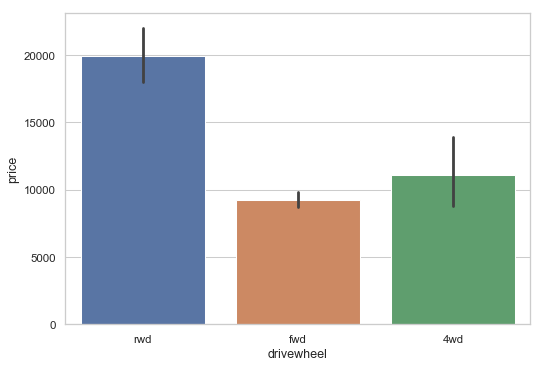

In [24]:
sns.barplot(dfcar.drivewheel,dfcar.price)

In [25]:
drive_wheels=dfcar.drivewheel.unique()
grup_dfcar=dfcar.groupby('drivewheel')

In [26]:
pd.options.display.float_format='{:.15f}'.format
karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
print("Price için karşılaştırma",end='')
for i in range(0,len(drive_wheels)-1):
    for j in range(i+1,len(drive_wheels)):
        ttest=stats.ttest_ind(dfcar[dfcar['drivewheel']==drive_wheels[i]]['price'],
                             dfcar[dfcar['drivewheel']==drive_wheels[j]]['price'])
        grup_1=drive_wheels[i]
        grup_2=drive_wheels[j]
        istatistik=ttest[0]
        p_degeri=ttest[1]
        karsilastirma=karsilastirma.append({"grup_1" : grup_1 ,
                                            "grup_2" : grup_2 ,
                                            "istatistik": istatistik , 
                                            "p_degeri" : p_degeri}, ignore_index=True)
display(karsilastirma)

Price için karşılaştırma

grup_1 grup_2         istatistik          p_degeri
0    rwd    fwd 11.670008861601973 0.000000000000000
1    rwd    4wd  2.858072420705504 0.005386865765311
2    fwd    4wd -1.589581043955542 0.114415637581711

In [27]:
adet_tablosu=pd.crosstab(dfcar['CarSegment'],dfcar['fueltype'])
adet_tablosu

fueltype    diesel  gas
CarSegment             
Low              3   92
Lux              5   37
Medium          12   56

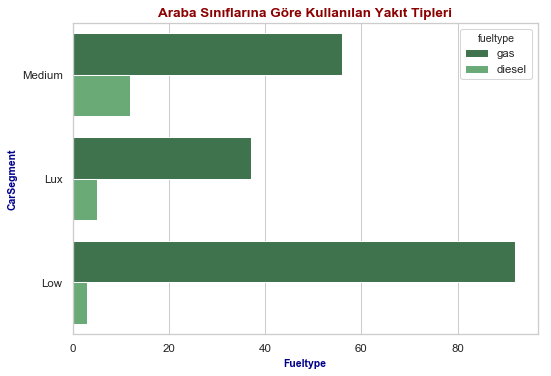

In [28]:
sns.countplot(y='CarSegment',hue='fueltype',data=dfcar,palette='Greens_d')
plt.title('Araba Sınıflarına Göre Kullanılan Yakıt Tipleri',fontdict=baslik_font)
plt.ylabel('CarSegment',fontdict=eksen_font)
plt.xlabel('Fueltype',fontdict=eksen_font)
plt.show()

In [29]:
print(stats.chisquare(adet_tablosu,axis=None))

Power_divergenceResult(statistic=179.79024390243907, pvalue=5.9325156499779566e-37)


In [30]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
pd.options.display.float_format='{:.5f}'.format
ozellikler=['price','enginesize','horsepower']
dagilim_testleri = pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])
for ozellik in ozellikler:
    jb_stats = jarque_bera(np.log(dfcar[ozellik]))
    norm_stats = normaltest(np.log(dfcar[ozellik]))
    dagilim_testleri = dagilim_testleri.append({"ozellik": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

ozellik  jarque_bera_stats  jarque_bera_p_value  normal_stats  \
0       price           15.71434              0.00039      14.10341   
1  enginesize           32.57522              0.00000      25.99676   
2  horsepower            8.56348              0.01382       8.25004   

   normal_p_value  
0         0.00087  
1         0.00000  
2         0.01616

In [31]:
from sklearn.preprocessing import normalize
dfcar["norm_price"] = normalize(np.array(dfcar['price']).reshape(1,-1)).reshape(-1,1)
dfcar["norm_enginesize"] = normalize(np.array(dfcar["enginesize"]).reshape(1,-1)).reshape(-1,1)
dfcar["norm_horsepower"] = normalize(np.array(dfcar["horsepower"]).reshape(1,-1)).reshape(-1,1)
normal_ozellikler=["price","norm_price","enginesize","norm_enginesize",
                    "horsepower","norm_horsepower"]
print('Minimum Değer\n-----------------',)
print(dfcar[normal_ozellikler].min())
print('\nMaksimum Değer\n-----------------',)
print(dfcar[normal_ozellikler].max())

Minimum Değer
-----------------
price             5118.00000
norm_price           0.02308
enginesize          61.00000
norm_enginesize      0.03191
horsepower          48.00000
norm_horsepower      0.03011
dtype: float64

Maksimum Değer
-----------------
price             45400.00000
norm_price            0.20477
enginesize          326.00000
norm_enginesize       0.17051
horsepower          288.00000
norm_horsepower       0.18066
dtype: float64


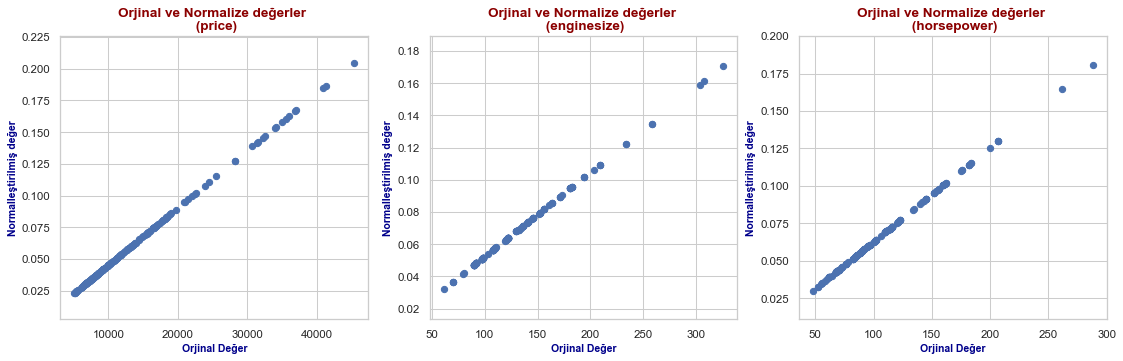

In [32]:
plt.figure(figsize=(18,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(dfcar[normal_ozellikler[2*i]], dfcar[normal_ozellikler[2*i+1]])
    plt.title("Orjinal ve Normalize değerler \n ({})".format(normal_ozellikler[2*i]), fontdict=baslik_font)
    plt.xlabel("Orjinal Değer", fontdict=eksen_font)
    plt.ylabel("Normalleştirilmiş değer", fontdict=eksen_font)

plt.show()

In [33]:
from sklearn.preprocessing import scale

dfcar['olcekli_price']=scale(dfcar['price'])
dfcar['olcekli_enginesize']=scale(dfcar['enginesize'])
dfcar['olcekli_horsepower']=scale(dfcar['horsepower'])
olcekli_ozellikler=['price','olcekli_price','enginesize','olcekli_enginesize','horsepower','olcekli_horsepower']
print('Standart Sapmalar\n----------------')
print(dfcar[olcekli_ozellikler].std())
print('\nOrtalamalar\n--------------')
print(dfcar[olcekli_ozellikler].mean())

Standart Sapmalar
----------------
price                7988.85233
olcekli_price           1.00245
enginesize             41.64269
olcekli_enginesize      1.00245
horsepower             39.54417
olcekli_horsepower      1.00245
dtype: float64

Ortalamalar
--------------
price                13276.71057
olcekli_price            0.00000
enginesize             126.90732
olcekli_enginesize       0.00000
horsepower             104.11707
olcekli_horsepower       0.00000
dtype: float64


In [34]:
dfcar.corr()

symboling  wheelbase  carlength  carwidth  carheight  \
symboling             1.00000   -0.53195   -0.35761  -0.23292   -0.54104   
wheelbase            -0.53195    1.00000    0.87459   0.79514    0.58943   
carlength            -0.35761    0.87459    1.00000   0.84112    0.49103   
carwidth             -0.23292    0.79514    0.84112   1.00000    0.27921   
carheight            -0.54104    0.58943    0.49103   0.27921    1.00000   
curbweight           -0.22769    0.77639    0.87773   0.86703    0.29557   
enginesize           -0.10579    0.56933    0.68336   0.73543    0.06715   
boreratio            -0.13005    0.48875    0.60645   0.55915    0.17107   
stroke               -0.00874    0.16096    0.12953   0.18294   -0.05531   
compressionratio     -0.17852    0.24979    0.15841   0.18113    0.26121   
horsepower            0.07087    0.35329    0.55262   0.64073   -0.10880   
peakrpm               0.27361   -0.36047   -0.28724  -0.22001   -0.32041   
citympg              -0.03582   -0.47041   -0.67091  -0.64270   -0.04864   
highwaympg            0.03461   -0.54408   -0.70466  -0.67722   -0.10736   
price                -0.07998    0.57782    0.68292   0.75933    0.11934   
norm_price           -0.07998    0.57782    0.68292   0.75933    0.11934   
norm_enginesize      -0.10579    0.56933    0.68336   0.73543    0.06715   
norm_horsepower       0.07087    0.35329    0.55262   0.64073   -0.10880   
olcekli_price        -0.07998    0.57782    0.68292   0.75933    0.11934   
olcekli_enginesize   -0.10579    0.56933    0.68336   0.73543    0.06715   
olcekli_horsepower    0.07087    0.35329    0.55262   0.64073   -0.10880   

                    curbweight  enginesize  boreratio   stroke  \
symboling             -0.22769    -0.10579   -0.13005 -0.00874   
wheelbase              0.77639     0.56933    0.48875  0.16096   
carlength              0.87773     0.68336    0.60645  0.12953   
carwidth               0.86703     0.73543    0.55915  0.18294   
carheight              0.29557     0.06715    0.17107 -0.05531   
curbweight             1.00000     0.85059    0.64848  0.16879   
enginesize             0.85059     1.00000    0.58377  0.20313   
boreratio              0.64848     0.58377    1.00000 -0.05591   
stroke                 0.16879     0.20313   -0.05591  1.00000   
compressionratio       0.15136     0.02897    0.00520  0.18611   
horsepower             0.75074     0.80977    0.57368  0.08094   
peakrpm               -0.26624    -0.24466   -0.25498 -0.06796   
citympg               -0.75741    -0.65366   -0.58453 -0.04214   
highwaympg            -0.79746    -0.67747   -0.58701 -0.04393   
price                  0.83530     0.87414    0.55317  0.07944   
norm_price             0.83530     0.87414    0.55317  0.07944   
norm_enginesize        0.85059     1.00000    0.58377  0.20313   
norm_horsepower        0.75074     0.80977    0.57368  0.08094   
olcekli_price          0.83530     0.87414    0.55317  0.07944   
olcekli_enginesize     0.85059     1.00000    0.58377  0.20313   
olcekli_horsepower     0.75074     0.80977    0.57368  0.08094   

                    compressionratio  ...  peakrpm  citympg  highwaympg  \
symboling                   -0.17852  ...  0.27361 -0.03582     0.03461   
wheelbase                    0.24979  ... -0.36047 -0.47041    -0.54408   
carlength                    0.15841  ... -0.28724 -0.67091    -0.70466   
carwidth                     0.18113  ... -0.22001 -0.64270    -0.67722   
carheight                    0.26121  ... -0.32041 -0.04864    -0.10736   
curbweight                   0.15136  ... -0.26624 -0.75741    -0.79746   
enginesize                   0.02897  ... -0.24466 -0.65366    -0.67747   
boreratio                    0.00520  ... -0.25498 -0.58453    -0.58701   
stroke                       0.18611  ... -0.06796 -0.04214    -0.04393   
compressionratio             1.00000  ... -0.43574  0.32470     0.26520   
horsepower                  -0.20433  ...  0.13107 -0.80146    -0.770

In [35]:
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

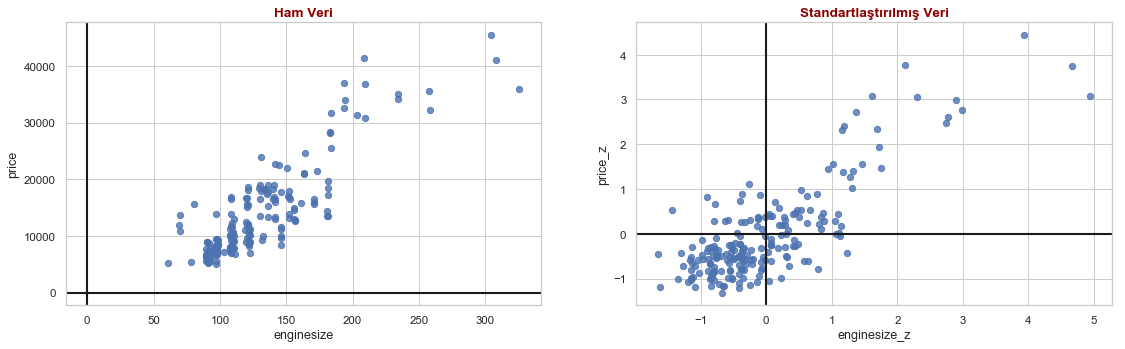

In [36]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)

t=sns.regplot('enginesize','price',dfcar,x_jitter=.49,y_jitter=.49,fit_reg=False)
t.axhline(0,color='k',linestyle='-',linewidth=2)
t.axvline(0,color='k',linestyle='-',linewidth=2)
t.axes.set_title('Ham Veri', fontdict = baslik_font)

plt.subplot(1,2,2)
dfcar_st=pd.DataFrame()
dfcar_st['enginesize_z']=(dfcar['enginesize']-dfcar['enginesize'].mean())/dfcar['enginesize'].std()
dfcar_st['price_z']=(dfcar['price']-dfcar['price'].mean())/dfcar['price'].std()

t=sns.regplot('enginesize_z','price_z',dfcar_st,x_jitter=.49,y_jitter=.49,fit_reg=False)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standartlaştırılmış Veri', fontdict = baslik_font)
plt.show()

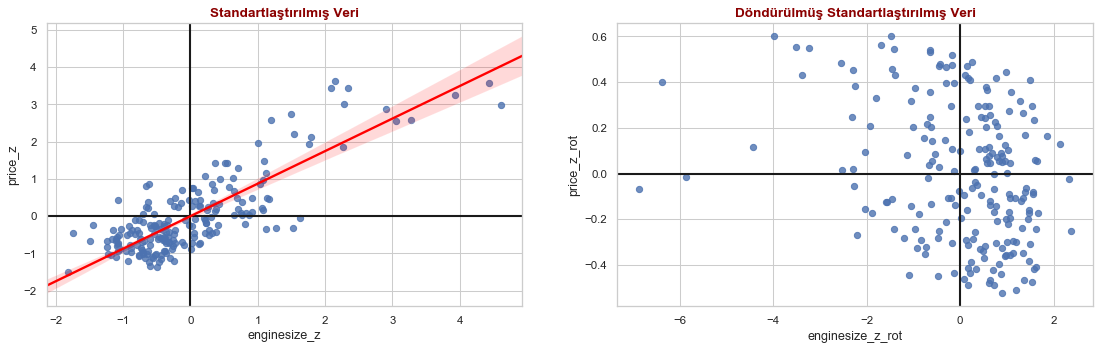

In [37]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)

t = sns.regplot('enginesize_z', 'price_z', dfcar_st, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standartlaştırılmış Veri', fontdict = baslik_font)

sns.regplot('enginesize_z', 'price_z', dfcar_st, scatter=False, color="red")
plt.subplot(1,2,2)

dfcar_st['enginesize_z_rot'] = math.cos(40) * dfcar_st['enginesize_z'] - math.sin(40) * dfcar_st['enginesize_z']
dfcar_st['price_z_rot'] = math.sin(40) * dfcar_st['price_z'] + math.cos(40) * dfcar_st['price_z']
t = sns.regplot('enginesize_z_rot','price_z_rot', dfcar_st, x_jitter=.49, y_jitter=.49,fit_reg=False )
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Döndürülmüş Standartlaştırılmış Veri', fontdict = baslik_font)
plt.show()

In [68]:
dfcar2 = dfcar.copy()

In [69]:
dfcar2['carCompany'] = dfcar2['carCompany'].astype('category')

In [49]:
cols = ['fueltype','carCompany','aspiration','doornumber','carbody','drivewheel',
                      'enginelocation','enginetype','cylindernumber','fuelsystem']

In [62]:
dfcar3 = pd.concat([dfcar2, pd.get_dummies(dfcar2[cols])], axis=1).drop(cols, axis = 1)

In [66]:
X=dfcar3.copy()
sklearn_pca=PCA(n_components=3)
dfcar_pca = sklearn_pca.fit_transform(X)

In [65]:
dfcar_pca.shape

(205, 3)

In [71]:
dfcar_pca

array([[ 2.18226002e+02, -1.12779017e+02,  5.44882713e+01],
       [ 3.21867279e+03, -5.03093268e+01,  2.07158412e+02],
       [ 3.23392114e+03, -1.30013399e+02, -5.74825300e+01],
       [ 6.58358527e+02,  4.36243439e+02,  1.34079596e+02],
       [ 4.17974712e+03,  3.67330548e+02, -1.53939982e+02],
       [ 1.96580377e+03,  4.13574418e+02,  3.69100334e+01],
       [ 4.44044032e+03,  3.66694998e+02, -1.60000622e+02],
       [ 5.65459455e+03,  3.59906129e+02, -2.03458479e+02],
       [ 1.06093731e+04,  4.25066478e+02, -7.87690788e+01],
       [ 4.60091940e+03,  3.10009000e+02, -3.53288831e+02],
       [ 3.13620832e+03,  7.57878189e+02,  1.17531176e+02],
       [ 3.63045832e+03,  7.68166455e+02,  1.42677496e+02],
       [ 7.69478342e+03, -7.22287119e+02,  4.96379857e+02],
       [ 7.83257269e+03, -7.35452744e+02,  4.50771915e+02],
       [ 1.13031324e+04, -7.47843161e+02,  3.49570867e+02],
       [ 1.74928100e+04,  4.30052018e+02,  1.59495309e+02],
       [ 2.80399871e+04,  6.05882872e+02

In [67]:
sklearn_pca.explained_variance_ratio_

array([0.99520143, 0.00374155, 0.00104448])